<a href="https://colab.research.google.com/github/netter233/tpo-data-science-diabetes/blob/main/Diabetes_Regresion_Logistica_No_Binario_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Preparación de Datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display


# Cargar el dataset
data = pd.read_csv('./sample_data/diabetes_012_health_indicators_BRFSS2015.csv')

#pd.read_csv('ruta/al/archivo.csv', error_bad_lines=False)

# Explorar los datos
print(data.head())
print(data.info())
print(data.describe())




   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

2. Cleansing y modelado


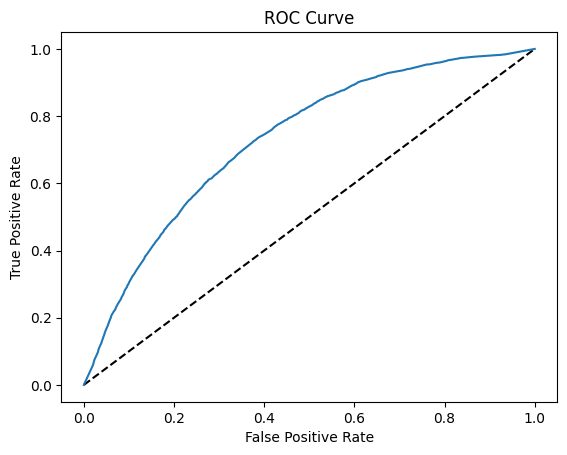

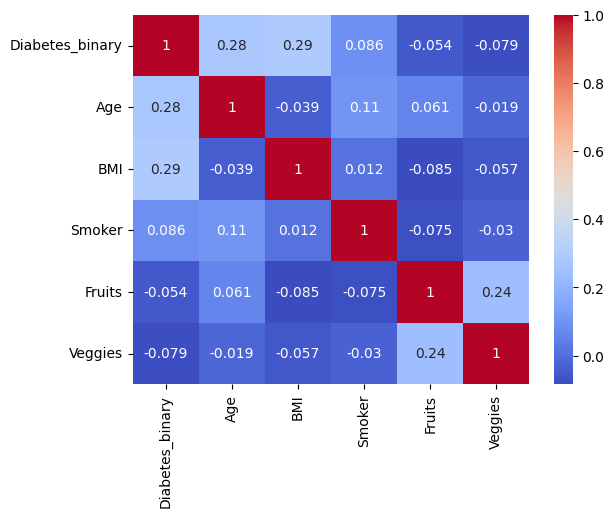

In [ ]:
# Limpiar y preparar los datos
# Si hay valores faltantes en una columna:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

# Seleccionar características y objetivo
X = data[['Age', 'BMI', 'Smoker', 'Fruits', 'Veggies']]    # Reemplazar con las columnas que queres usar como características
y = data['Diabetes_binary']  # Reemplazar con la columna que queres predecir

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de regresión logística
# model = LogisticRegression()
model = DecisionTreeClassifier()
# model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)



# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate correlation matrix
corr_matrix = data[['Diabetes_binary', 'Age', 'BMI', 'Smoker', 'Fruits', 'Veggies']].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



3. Evaluar el modelo

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Error cuadrático medio (MSE): 0.3271878536401358
Coeficiente de determinación (R²): -0.3087515193120478
Accuracy: 0.6728121463598642


In [ ]:

# Create input widgets
age_input = widgets.IntSlider(min=18, max=80, description="Age:")
bmi_input = widgets.FloatSlider(min=15, max=50, description="BMI:")
smoker_input = widgets.Checkbox(description="Smoker:")
fruits_input = widgets.Checkbox(description="Fruits:")
veggies_input = widgets.Checkbox(description="Veggies:")

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Define prediction function
def predict_diabetes(b):
    # Get user input values
    user_input = pd.DataFrame({
        'Age': [age_input.value],
        'BMI': [bmi_input.value],
        'Smoker': [smoker_input.value],
        'Fruits': [fruits_input.value],
        'Veggies': [veggies_input.value]
    })

    # Make prediction
    prediction = model.predict_proba(user_input)[0][1]

    # Display prediction
    print(f"Probability of Diabetes: {prediction:.2f}")

# Assign prediction function to button click event
predict_button.on_click(predict_diabetes)

# Display UI elements
display(age_input, bmi_input, smoker_input, fruits_input, veggies_input, predict_button)

IntSlider(value=18, description='Age:', max=80, min=18)

FloatSlider(value=15.0, description='BMI:', max=50.0, min=15.0)

Checkbox(value=False, description='Smoker:')

Checkbox(value=False, description='Fruits:')

Checkbox(value=False, description='Veggies:')

Button(description='Predict', style=ButtonStyle())

Probability of Diabetes: 0.67
Probability of Diabetes: 0.71
Probability of Diabetes: 0.71
Probability of Diabetes: 0.43
Probability of Diabetes: 0.36
Probability of Diabetes: 0.32
Probability of Diabetes: 0.54
Probability of Diabetes: 0.73
Probability of Diabetes: 0.30
Probability of Diabetes: 0.59
Probability of Diabetes: 0.59
Probability of Diabetes: 0.59
Probability of Diabetes: 0.59
Probability of Diabetes: 0.47
Probability of Diabetes: 0.47
Probability of Diabetes: 0.47
Probability of Diabetes: 0.47
Probability of Diabetes: 0.47
Probability of Diabetes: 0.47
Probability of Diabetes: 0.56
Probability of Diabetes: 0.47
Probability of Diabetes: 0.50
Probability of Diabetes: 0.44
Probability of Diabetes: 1.00
Probability of Diabetes: 1.00
Probability of Diabetes: 0.33
Probability of Diabetes: 0.33
Probability of Diabetes: 0.33
Probability of Diabetes: 0.33
Probability of Diabetes: 0.33
Probability of Diabetes: 0.33
Probability of Diabetes: 0.26
Probability of Diabetes: 0.26
Probabilit